## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 181us/step - loss: 2.1691 - acc: 0.2195 - val_loss: 2.1369 - val_acc: 0.2436
Epoch 2/500
50000/50000 [==============================] - 9s 179us/step - loss: 2.1081 - acc: 0.2542 - val_loss: 2.0846 - val_acc: 0.2672
Epoch 3/500
50000/50000 [==============================] - 9s 174us/step - loss: 2.0623 - acc: 0.2741 - val_loss: 2.0459 - val_acc: 0.2721
Epoch 4/500
50000/50000 [==============================] - 9s 184us/step - loss: 2.0268 - acc: 0.2874 - val_loss: 2.0134 - val_acc: 0.2933
Epoch 5/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.9978 - acc: 0.2970 - val_loss: 1.9869 - val_acc: 0.3044
Epoch 6/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.9730 - acc: 0.3073 - val_loss: 1.9644 - val_acc: 0.3119
Epoch 7/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.9515 - acc: 0.3146 - val_loss: 1

50000/50000 [==============================] - 8s 170us/step - loss: 1.6373 - acc: 0.4287 - val_loss: 1.6472 - val_acc: 0.4253
Epoch 60/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6340 - acc: 0.4306 - val_loss: 1.6415 - val_acc: 0.4245
Epoch 61/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6312 - acc: 0.4332 - val_loss: 1.6410 - val_acc: 0.4247
Epoch 62/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.6281 - acc: 0.4331 - val_loss: 1.6385 - val_acc: 0.4266
Epoch 63/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.6255 - acc: 0.4328 - val_loss: 1.6363 - val_acc: 0.4258
Epoch 64/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.6227 - acc: 0.4344 - val_loss: 1.6314 - val_acc: 0.4299
Epoch 65/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6196 - acc: 0.4355 - val_loss: 1.6338 - val_acc: 0.4289
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 11s 210us/step - loss: 1.5051 - acc: 0.4748 - val_loss: 1.5331 - val_acc: 0.4619
Epoch 118/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.5033 - acc: 0.4757 - val_loss: 1.5353 - val_acc: 0.4603
Epoch 119/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.5015 - acc: 0.4761 - val_loss: 1.5327 - val_acc: 0.4600
Epoch 120/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.4999 - acc: 0.4754 - val_loss: 1.5337 - val_acc: 0.4653
Epoch 121/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4980 - acc: 0.4769 - val_loss: 1.5274 - val_acc: 0.4623
Epoch 122/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4960 - acc: 0.4772 - val_loss: 1.5277 - val_acc: 0.4632
Epoch 123/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4942 - acc: 0.4785 - val_loss: 1.5262 - val_acc: 0.4639
Epoch 124/500
50000/50000

50000/50000 [==============================] - 9s 170us/step - loss: 1.4121 - acc: 0.5063 - val_loss: 1.4662 - val_acc: 0.4804
Epoch 176/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.4107 - acc: 0.5071 - val_loss: 1.4695 - val_acc: 0.4846
Epoch 177/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4088 - acc: 0.5065 - val_loss: 1.4651 - val_acc: 0.4836
Epoch 178/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4072 - acc: 0.5077 - val_loss: 1.4710 - val_acc: 0.4817
Epoch 179/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4060 - acc: 0.5096 - val_loss: 1.4614 - val_acc: 0.4859
Epoch 180/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.4046 - acc: 0.5090 - val_loss: 1.4688 - val_acc: 0.4859
Epoch 181/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4031 - acc: 0.5092 - val_loss: 1.4617 - val_acc: 0.4828
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 1.3312 - acc: 0.5358 - val_loss: 1.4196 - val_acc: 0.4952
Epoch 234/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.3297 - acc: 0.5365 - val_loss: 1.4181 - val_acc: 0.4971
Epoch 235/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.3294 - acc: 0.5384 - val_loss: 1.4319 - val_acc: 0.4880
Epoch 236/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3278 - acc: 0.5360 - val_loss: 1.4226 - val_acc: 0.4967
Epoch 237/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.3263 - acc: 0.5387 - val_loss: 1.4192 - val_acc: 0.4943
Epoch 238/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.3255 - acc: 0.5371 - val_loss: 1.4137 - val_acc: 0.5020
Epoch 239/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3236 - acc: 0.5392 - val_loss: 1.4173 - val_acc: 0.4956
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 1.2605 - acc: 0.5613 - val_loss: 1.3960 - val_acc: 0.5029
Epoch 292/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.2596 - acc: 0.5611 - val_loss: 1.3821 - val_acc: 0.5156
Epoch 293/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.2591 - acc: 0.5617 - val_loss: 1.3929 - val_acc: 0.5076
Epoch 294/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.2564 - acc: 0.5624 - val_loss: 1.3879 - val_acc: 0.5080
Epoch 295/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2559 - acc: 0.5644 - val_loss: 1.3838 - val_acc: 0.5124
Epoch 296/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.2543 - acc: 0.5639 - val_loss: 1.3798 - val_acc: 0.5097
Epoch 297/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.2540 - acc: 0.5635 - val_loss: 1.3823 - val_acc: 0.5115
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 169us/step - loss: 1.1950 - acc: 0.5845 - val_loss: 1.3634 - val_acc: 0.5232
Epoch 350/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.1943 - acc: 0.5842 - val_loss: 1.3778 - val_acc: 0.5157
Epoch 351/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.1933 - acc: 0.5860 - val_loss: 1.3647 - val_acc: 0.5200
Epoch 352/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.1921 - acc: 0.5864 - val_loss: 1.3569 - val_acc: 0.5213
Epoch 353/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.1903 - acc: 0.5866 - val_loss: 1.3919 - val_acc: 0.5054
Epoch 354/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.1889 - acc: 0.5871 - val_loss: 1.3582 - val_acc: 0.5204
Epoch 355/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.1887 - acc: 0.5878 - val_loss: 1.3567 - val_acc: 0.5215
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 9s 181us/step - loss: 1.1328 - acc: 0.6071 - val_loss: 1.3671 - val_acc: 0.5206
Epoch 408/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.1314 - acc: 0.6074 - val_loss: 1.3502 - val_acc: 0.5304
Epoch 409/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.1301 - acc: 0.6084 - val_loss: 1.3567 - val_acc: 0.5182
Epoch 410/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1310 - acc: 0.6066 - val_loss: 1.3497 - val_acc: 0.5273
Epoch 411/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1283 - acc: 0.6078 - val_loss: 1.3878 - val_acc: 0.5145
Epoch 412/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1290 - acc: 0.6081 - val_loss: 1.3557 - val_acc: 0.5236
Epoch 413/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.1267 - acc: 0.6089 - val_loss: 1.4132 - val_acc: 0.5079
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 9s 178us/step - loss: 1.0737 - acc: 0.6281 - val_loss: 1.3569 - val_acc: 0.5247
Epoch 466/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.0736 - acc: 0.6270 - val_loss: 1.3452 - val_acc: 0.5226
Epoch 467/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.0731 - acc: 0.6285 - val_loss: 1.3610 - val_acc: 0.5254
Epoch 468/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.0688 - acc: 0.6288 - val_loss: 1.3483 - val_acc: 0.5283
Epoch 469/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.0687 - acc: 0.6301 - val_loss: 1.3913 - val_acc: 0.5162
Epoch 470/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.0689 - acc: 0.6297 - val_loss: 1.3572 - val_acc: 0.5288
Epoch 471/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.0680 - acc: 0.6309 - val_loss: 1.4075 - val_acc: 0.5112
Epoch 472/500
50000/50000 [

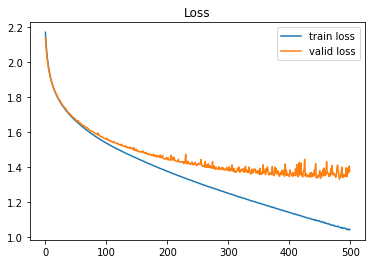

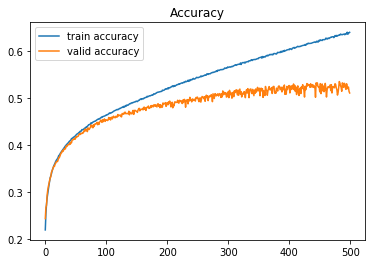

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()